<a href="https://colab.research.google.com/github/IkhlasAhmad1998/DeepLearning_Assignments/blob/main/Ionosphere_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [427]:
import numpy as np
import pandas as pd

In [428]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/ionosphere_data.csv')

In [429]:
np.random.seed(1234)
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [430]:
data.drop('feature2', axis=1, inplace=True)

In [431]:
data.isnull().any()

feature1     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [432]:
data.label

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature22 

In [434]:
labels = data.iloc[:,-1]
data.drop('label', axis=1, inplace=True)

In [435]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)

In [436]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.4, random_state=42)

In [437]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data-mean) / std
test_data = (test_data-mean) / std

In [438]:
# Making Base Model
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (train_data.shape[1],)))
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(12, activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [439]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 16)                544       
_________________________________________________________________
dropout_113 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_248 (Dense)            (None, 10)                170       
_________________________________________________________________
dense_249 (Dense)            (None, 8)                 88        
_________________________________________________________________
dropout_114 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_250 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_251 (Dense)            (None, 1)               

In [440]:
epochs = 40
history = model.fit(train_data, train_labels, epochs = epochs, batch_size =8, validation_split=0.1)

Epoch 1/40
24/24 [==============================] - 1s 12ms/step - loss: 0.7364 - accuracy: 0.6225 - val_loss: 0.6949 - val_accuracy: 0.6667
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6533 - val_loss: 0.6716 - val_accuracy: 0.6667
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6922 - val_loss: 0.6434 - val_accuracy: 0.6667
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6333 - val_loss: 0.6144 - val_accuracy: 0.6667
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.6693 - val_loss: 0.5813 - val_accuracy: 0.6667
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7107 - val_loss: 0.5570 - val_accuracy: 0.6667
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7034 - val_loss: 0.5400 - val_accuracy: 0.6667
Epoch 8/40
24/24 [=

In [441]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

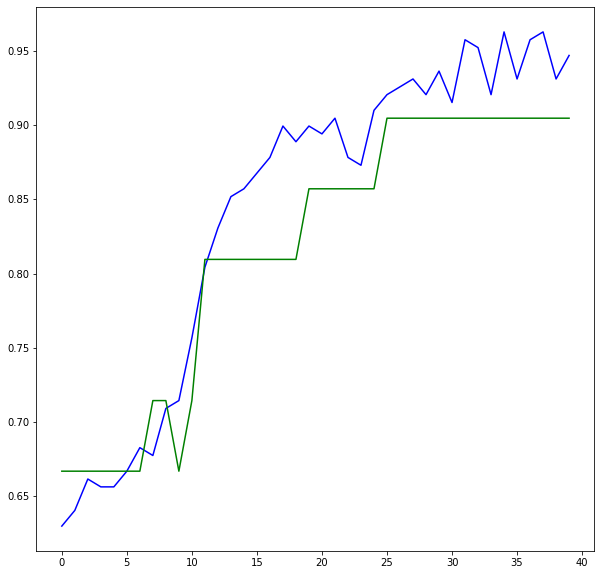

In [442]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(epochs)
fig = plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'g')
plt.show()


In [443]:
model.evaluate(test_data, test_labels)

5/5 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.9362


[0.28107863664627075, 0.936170220375061]